In [121]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# import file
etfFiles1=pd.read_csv('justetf 3.csv')
etfFiles1

,isin,wkn,name,fundProvider,legalStructure,quote,quote52Low,quote52High,ytdReturnCUR,ter,...,exposureCountry_Argentina,exposureCountry_Macedonia,exposureCountry_Peru,exposureCountry_Russia,exposureCountry_Cyprus,exposureCountry_Colombia,exposureCountry_Czech Republic,exposureCountry_Slovakia,exposureCountry_Slovenia,exposureCountry_Bulgaria
0,IE00B0M62Y33,A0HGWF,iShares AEX UCITS ETF,iShares,ETF,73.98,62.81,76.92,0.0541,0.0030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IE00BMTX2B82,A2P9XA,iShares AEX UCITS ETF EUR (Acc),iShares,ETF,6.68,5.80,7.13,0.0503,0.0030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NL0009272749,A1JN2C,VanEck AEX UCITS ETF,VanEck,ETF,72.34,63.16,77.27,0.0510,0.0030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IE000RN036E0,A3DGK2,First Trust Alerian Disruptive Technology Real...,First Trust,ETF,17.44,17.07,23.80,0.0029,0.0060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IE00BKPTXQ89,A2P4PH,HANetf Alerian Midstream Energy Dividend UCITS...,HANetf,ETF,10.7,10.39,13.12,-0.0599,0.0040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,IE00BD6RZW23,A2AS6C,WisdomTree US Equity Income UCITS ETF EUR Hedg...,WisdomTree,ETF,19.69,18.67,22.28,-0.0777,0.0035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2260,IE00BZ56RG20,A2AGPV,WisdomTree US Quality Dividend Growth UCITS ET...,WisdomTree,ETF,31.98,29.23,34.89,0.0019,0.0033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2261,IE00B3Y8D011,A1C1G8,Xtrackers Portfolio Income UCITS ETF 1D,Xtrackers,ETF,11.79,11.41,12.92,0.0164,0.0065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2262,CH0496484640,A22FMC,21Shares Bitcoin Suisse Index ETP,21Shares,ETN,11.88,7.35,20.93,0.6027,0.0250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data Cleaning

In [205]:
columns_to_keep = ['inceptionDate', 'quoteDate', 'ter', 'quote',
'fundSizeMillions', 'isin', 'ytdReturnCUR', 'yearVolatilityCUR', 'currencyRisk','UCITSCompliance','domicileCountry','fundCurrency','name']

In [206]:
#Keep the columns that will  be used
etfFiles = etfFiles1[columns_to_keep] 


In [207]:
#Data conversion 

etfFiles['inceptionDate'] = pd.to_datetime(etfFiles['inceptionDate'], errors='coerce')
etfFiles['quoteDate'] = pd.to_datetime(etfFiles['quoteDate'])
etfFiles['ter'] = pd.to_numeric(etfFiles['ter'], errors='coerce')
etfFiles['quote']=pd.to_numeric(etfFiles['quote'],errors='coerce')
etfFiles['fundSizeMillions']=pd.to_numeric(etfFiles['fundSizeMillions'],errors='coerce') 


/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/3931178632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etfFiles['inceptionDate'] = pd.to_datetime(etfFiles['inceptionDate'], errors='coerce')
/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/3931178632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etfFiles['quoteDate'] = pd.to_datetime(etfFiles['quoteDate'])
/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/3931178632.py:5: SettingWithCopyWarning: 


In [208]:
# Filter quoteDate of the ETFs - March 2023

filtered_data = etfFiles[(etfFiles['quoteDate'] >= '2023-03-01') & (etfFiles['quoteDate'] < '2023-04-01')]
filtered_data

#filtered_data['quoteDate'].unique()


,inceptionDate,quoteDate,ter,quote,fundSizeMillions,isin,ytdReturnCUR,yearVolatilityCUR,currencyRisk,UCITSCompliance,domicileCountry,fundCurrency,name
0,2005-11-18,2023-03-21,0.0030,73.98,587.0,IE00B0M62Y33,0.0541,0.1879,Currency unhedged,Yes,Ireland,EUR,iShares AEX UCITS ETF
1,2020-07-29,2023-03-17,0.0030,6.68,21.0,IE00BMTX2B82,0.0503,0.1906,Currency unhedged,Yes,Ireland,EUR,iShares AEX UCITS ETF EUR (Acc)
2,2009-12-14,2023-03-17,0.0030,72.34,252.0,NL0009272749,0.0510,0.1898,Currency unhedged,Yes,Netherlands,EUR,VanEck AEX UCITS ETF
3,2022-03-31,2023-03-21,0.0060,17.44,2.0,IE000RN036E0,0.0029,NaN,Currency unhedged,Yes,Ireland,USD,First Trust Alerian Disruptive Technology Real...
4,2020-07-27,2023-03-21,0.0040,10.70,18.0,IE00BKPTXQ89,-0.0599,0.2473,Currency unhedged,Yes,Ireland,USD,HANetf Alerian Midstream Energy Dividend UCITS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2016-11-07,2023-03-21,0.0035,19.69,1.0,IE00BD6RZW23,-0.0777,0.2135,Currency hedged,Yes,Ireland,EUR Hedged,WisdomTree US Equity Income UCITS ETF EUR Hedg...
2260,2016-06-03,2023-03-21,0.0033,31.98,344.0,IE00BZ56RG20,0.0019,0.2117,Currency unhedged,Yes,Ireland,USD,WisdomTree US Quality Dividend Growth UCITS ET...
2261,2011-02-04,2023-03-21,0.0065,11.79,70.0,IE00B3Y8D011,0.0164,0.0650,Currency unhedged,Yes,Ireland,EUR,Xtrackers Portfolio Income UCITS ETF 1D
2262,2019-10-04,2023-03-21,0.0250,11.88,20.0,CH0496484640,0.6027,0.6274,Currency unhedged,No,Switzerland,USD,21Shares Bitcoin Suisse Index ETP


In [167]:
# index values
filtered_data.index = filtered_data['isin'].values
#filtered_data.set_index('isin',inplace=True)

In [239]:
# Delete values where the ytdReturnCUR  or yearVolatilityCUR is null
filtered_data.dropna(subset=['ytdReturnCUR'],inplace=True)
filtered_data.dropna(subset=['yearVolatilityCUR'],inplace=True)
filtered_data

/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/1853421522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['ytdReturnCUR'],inplace=True)
/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/1853421522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['yearVolatilityCUR'],inplace=True)


,inceptionDate,quoteDate,ter,quote,fundSizeMillions,isin,ytdReturnCUR,yearVolatilityCUR,currencyRisk,UCITSCompliance,domicileCountry,fundCurrency,name,Group,Fee_comparison,Currency_Risk,Compliance,Volume,Risk_Group
0,2005-11-18,2023-03-21,0.0030,73.98,587.0,IE00B0M62Y33,0.0541,0.1879,Currency unhedged,Yes,Ireland,EUR,iShares AEX UCITS ETF,B,1,0,1,1,Moderate
1,2020-07-29,2023-03-17,0.0030,6.68,21.0,IE00BMTX2B82,0.0503,0.1906,Currency unhedged,Yes,Ireland,EUR,iShares AEX UCITS ETF EUR (Acc),B,1,0,1,1,Moderate
2,2009-12-14,2023-03-17,0.0030,72.34,252.0,NL0009272749,0.0510,0.1898,Currency unhedged,Yes,Netherlands,EUR,VanEck AEX UCITS ETF,B,1,0,1,1,Moderate
4,2020-07-27,2023-03-21,0.0040,10.70,18.0,IE00BKPTXQ89,-0.0599,0.2473,Currency unhedged,Yes,Ireland,USD,HANetf Alerian Midstream Energy Dividend UCITS...,A,1,0,1,1,Moderate
5,2021-11-22,2023-03-21,0.0250,2.14,1.0,CH1146882316,0.3049,0.8803,Currency unhedged,No,Switzerland,USD,21Shares Algorand ETP,E,0,0,0,0,Aggressive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2016-11-07,2023-03-21,0.0035,19.69,1.0,IE00BD6RZW23,-0.0777,0.2135,Currency hedged,Yes,Ireland,EUR Hedged,WisdomTree US Equity Income UCITS ETF EUR Hedg...,A,1,1,1,0,Moderate
2260,2016-06-03,2023-03-21,0.0033,31.98,344.0,IE00BZ56RG20,0.0019,0.2117,Currency unhedged,Yes,Ireland,USD,WisdomTree US Quality Dividend Growth UCITS ET...,A,1,0,1,1,Moderate
2261,2011-02-04,2023-03-21,0.0065,11.79,70.0,IE00B3Y8D011,0.0164,0.0650,Currency unhedged,Yes,Ireland,EUR,Xtrackers Portfolio Income UCITS ETF 1D,A,0,0,1,1,Conservative
2262,2019-10-04,2023-03-21,0.0250,11.88,20.0,CH0496484640,0.6027,0.6274,Currency unhedged,No,Switzerland,USD,21Shares Bitcoin Suisse Index ETP,E,0,0,0,1,Aggressive


Data Transformation

In [209]:
#Groups of ETF according to the ytdReturnCUR

filtered_data['Group']='A'
filtered_data.loc[(filtered_data['ytdReturnCUR']>=0.04)&(filtered_data['ytdReturnCUR']<0.06),'Group']='B'
filtered_data.loc[(filtered_data['ytdReturnCUR']>=0.06)&(filtered_data['ytdReturnCUR']<0.08),'Group']='C'
filtered_data.loc[(filtered_data['ytdReturnCUR']>=0.08)&(filtered_data['ytdReturnCUR']<0.14),'Group']='D'
filtered_data.loc[(filtered_data['ytdReturnCUR']>0.14),'Group']='E'
filtered_data.loc[(filtered_data['ytdReturnCUR']>0.14),'Group']='E'

/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/777469309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Group']='A'


In [210]:
# check distribution by groups
filtered_data.groupby('Group').ytdReturnCUR.aggregate([np.count_nonzero, np.min, np.max, np.mean])


,count_nonzero,min,max,mean
Group,,,,
A,1610,-0.2202,0.1400,0.001433
B,233,0.0400,0.0599,0.048462
C,111,0.0600,0.0798,0.070741
D,180,0.0800,0.1398,0.103029
E,118,0.1401,1.4638,0.396619


In [211]:
# What is the equivalency of ter on the quote
filtered_data['Fee_comparison']=(filtered_data['ter']<0.0005*filtered_data['quote']).astype(int)

/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/329952571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Fee_comparison']=(filtered_data['ter']<0.0005*filtered_data['quote']).astype(int)


In [212]:
# column "Currency_Risk". If the colum " currencyRisk" is hedge is good=1 else 0
filtered_data['Currency_Risk'] = filtered_data['currencyRisk'].apply(lambda x: 1 if x == 'Currency hedged' else 0)

#filtered_data['Currency_Risk'].unique()
#filtered_data['currencyRisk'].unique()

/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/3304031432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Currency_Risk'] = filtered_data['currencyRisk'].apply(lambda x: 1 if x == 'Currency hedged' else 0)


In [213]:
#"Compliance" . If the column "UCITSCompliance" is yes then 1 else 0

filtered_data['Compliance'] = filtered_data['UCITSCompliance'].apply(lambda x: 1 if x == 'Yes' else 0)

#filtered_data['Compliance'].unique()
#filtered_data['UCITSCompliance'].unique()

/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/3033703094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Compliance'] = filtered_data['UCITSCompliance'].apply(lambda x: 1 if x == 'Yes' else 0)


In [214]:
#Volume" if the column "fundSizeMillions" is more than 10 Million then  good=1 else 0

filtered_data['Volume'] = filtered_data['fundSizeMillions'].apply(lambda x:1 if x > 10 else 0)

#filtered_data['fundSizeMillions'].info()
#filtered_data['Volume'].unique()

/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/2323103843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Volume'] = filtered_data['fundSizeMillions'].apply(lambda x:1 if x > 10 else 0)


In [217]:
# K-means to get 3 risk groups - Conservative, Moderate and Aggressive

kmeans = KMeans(n_clusters=3, random_state=0).fit(filtered_data[['yearVolatilityCUR']])
filtered_data['Risk_Group'] = kmeans.labels_

/opt/homebrew/anaconda3/envs/pythonProject1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/792028483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Risk_Group'] = kmeans.labels_


In [218]:
# check the values of the distribution to assign the risk group 

filtered_data.groupby('Risk_Group').yearVolatilityCUR.aggregate([np.count_nonzero, np.min, np.max, np.mean])


,count_nonzero,min,max,mean
Risk_Group,,,,
0,978,0.1836,0.5193,0.241418
1,999,0.0011,0.1834,0.126305
2,59,0.5810,1.9948,0.837736


In [219]:
# assign the risk group 

filtered_data['Risk_Group']= filtered_data['Risk_Group'].map({0: 'Moderate', 1: 'Conservative', 2: 'Aggressive'})

/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/3546465751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Risk_Group']= filtered_data['Risk_Group'].map({0: 'Moderate', 1: 'Conservative', 2: 'Aggressive'})


In [220]:
# check values of risk group

filtered_data.groupby('Risk_Group').yearVolatilityCUR.aggregate([np.count_nonzero, np.min, np.max, np.mean])


,count_nonzero,min,max,mean
Risk_Group,,,,
Aggressive,59,0.5810,1.9948,0.837736
Conservative,999,0.0011,0.1834,0.126305
Moderate,978,0.1836,0.5193,0.241418


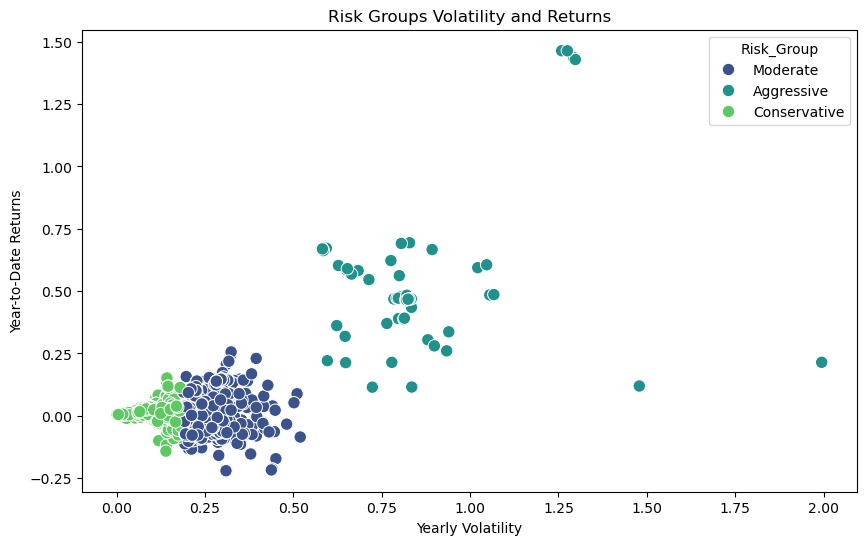

In [221]:
#Data Visualisations 

#Scatter plot 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='yearVolatilityCUR', y='ytdReturnCUR', hue='Risk_Group', data=filtered_data, palette='viridis', s=80)
plt.title('Risk Groups Volatility and Returns')
plt.xlabel('Yearly Volatility')
plt.ylabel('Year-to-Date Returns')
plt.show()

/var/folders/wt/tn293lt1691gsc83v_zk693h0000gn/T/ipykernel_18342/4257303996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk_Group', y='ytdReturnCUR', data=filtered_data, palette='viridis')


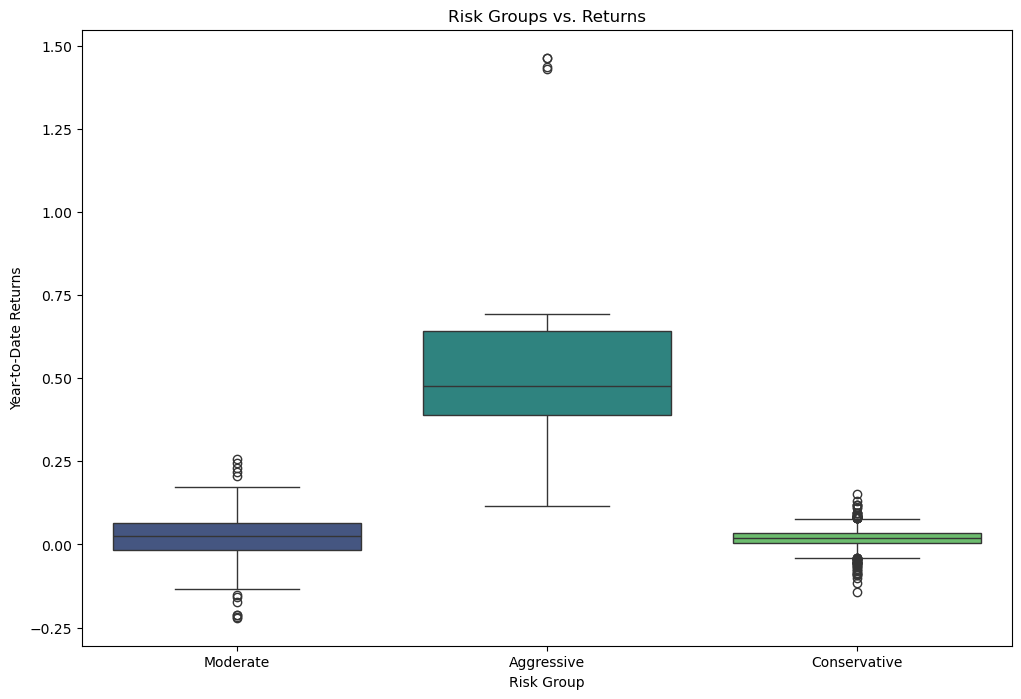

In [222]:
#Boxplot

plt.figure(figsize=(12, 8))
sns.boxplot(x='Risk_Group', y='ytdReturnCUR', data=filtered_data, palette='viridis')
plt.title('Risk Groups vs. Returns')
plt.xlabel('Risk Group')
plt.ylabel('Year-to-Date Returns')
plt.show()


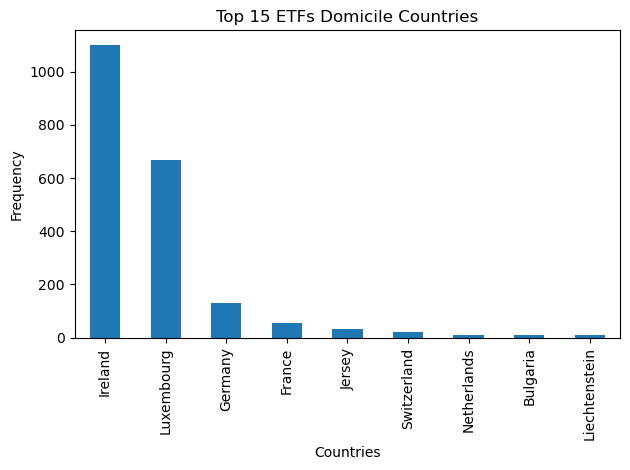

In [244]:
# Top Domicile Countries

# We are counting how many time each country is appearing
filtered_data['domicileCountry'].value_counts().head(15).sort_values(ascending=False).plot(kind='bar')

# Adding labels and title
plt.title('Top 15 ETFs Domicile Countries')
plt.xlabel('Countries')
plt.ylabel('Frequency')

# Save the plot as an image
plt.tight_layout()
plt.savefig('Top_15_ETFs_Countries.png')

plt.show()

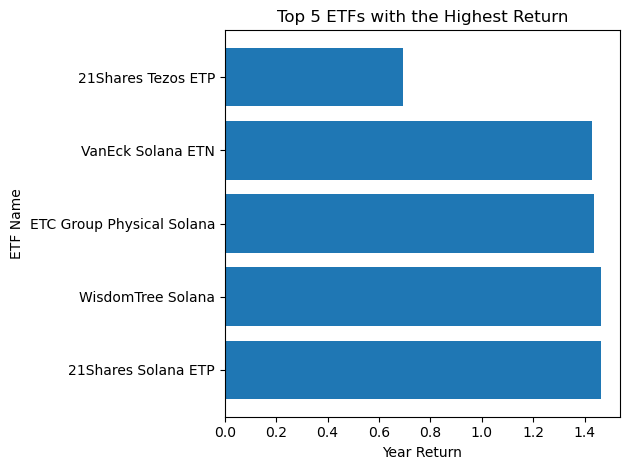

In [245]:
top_5_etfs = filtered_data.sort_values(by='ytdReturnCUR', ascending=False).head(5)

# Create a clustered bar chart
plt.barh(top_5_etfs['name'], top_5_etfs['ytdReturnCUR'],)

# Adding labels and title
plt.title('Top 5 ETFs with the Highest Return')
plt.xlabel('Year Return')
plt.ylabel('ETF Name')

# Save the plot as an image
plt.tight_layout()
plt.savefig('Top_5_ETFs_Highest_Return.png')


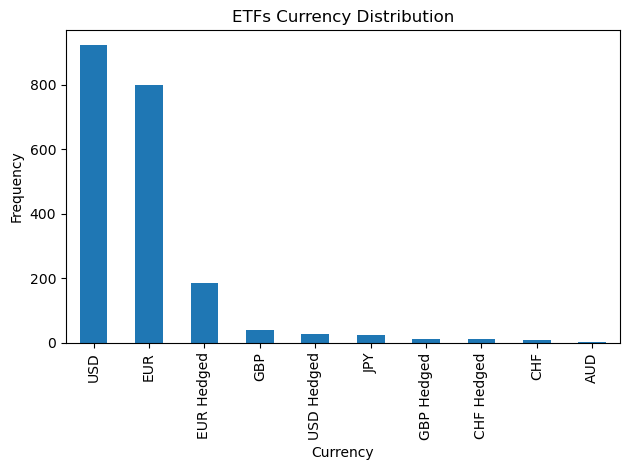

In [246]:
# We are counting how many time each currency  is appearing

filtered_data['fundCurrency'].value_counts().head(10).sort_values(ascending=False).plot(kind='bar')

plt.title('ETFs Currency Distribution')
plt.xlabel('Currency')
plt.ylabel('Frequency')

# Save the plot as an image
plt.tight_layout()
plt.savefig('ETFs_Currency_Distribution.png')

plt.show()

In [240]:
# best ETF that qualify the logic parameters in volume, currency among others

best_etf = filtered_data[(filtered_data['Group']!='A') & (filtered_data['Volume']==1) & (filtered_data['Compliance']==1)& (filtered_data['Currency_Risk']==1)& (filtered_data['Fee_comparison']==1)]
best_etf

,inceptionDate,quoteDate,ter,quote,fundSizeMillions,isin,ytdReturnCUR,yearVolatilityCUR,currencyRisk,UCITSCompliance,domicileCountry,fundCurrency,name,Group,Fee_comparison,Currency_Risk,Compliance,Volume,Risk_Group
482,2015-01-30,2023-03-21,0.0020,185.96,53.0,FR0012399772,0.1070,0.2180,Currency hedged,Yes,France,GBP Hedged,Lyxor EURO STOXX 50 (DR) UCITS ETF - Daily Hed...,D,1,1,1,1,Moderate
483,2015-01-07,2023-03-21,0.0020,184.85,32.0,FR0012399806,0.0953,0.2194,Currency hedged,Yes,France,USD Hedged,Lyxor EURO STOXX 50 (DR) UCITS ETF - Daily Hed...,D,1,1,1,1,Moderate
821,2017-10-24,2023-03-17,0.0010,3.73,130.0,IE00BD8PH067,0.0688,0.2552,Currency hedged,Yes,Ireland,CHF Hedged,iShares USD Treasury Bond 20+ UCITS ETF CHF He...,C,1,1,1,1,Moderate
822,2017-09-21,2023-03-21,0.0010,3.70,582.0,IE00BD8PGZ49,0.0686,0.2393,Currency hedged,Yes,Ireland,EUR Hedged,iShares USD Treasury Bond 20+yr EUR Hedged UCI...,C,1,1,1,1,Moderate
1012,2017-12-20,2023-03-21,0.0033,12.40,958.0,IE00BDR55927,0.0460,0.2097,Currency hedged,Yes,Ireland,EUR Hedged,UBS ETF (IE) MSCI ACWI Socially Responsible UC...,B,1,1,1,1,Moderate
1138,2015-06-30,2023-03-17,0.0017,18.31,23.0,LU1215828218,0.0584,0.1847,Currency hedged,Yes,Luxembourg,CHF Hedged,Xtrackers MSCI EMU UCITS ETF 3C CHF hedged,B,1,1,1,1,Moderate
1139,2015-03-31,2023-03-21,0.0017,31.78,19.0,LU1127516455,0.0939,0.2079,Currency hedged,Yes,Luxembourg,GBP Hedged,Xtrackers MSCI EMU UCITS ETF 2C GBP hedged,D,1,1,1,1,Moderate
1140,2019-06-05,2023-03-17,0.0015,6.43,458.0,IE00BKBF6616,0.0717,0.1790,Currency hedged,Yes,Ireland,USD Hedged,iShares Core MSCI EMU UCITS ETF USD Hedged (Acc),C,1,1,1,1,Conservative
1141,2015-06-30,2023-03-21,0.0038,7.77,184.0,IE00BWZN1T31,0.0754,0.1776,Currency hedged,Yes,Ireland,USD Hedged,iShares MSCI EMU USD Hedged UCITS ETF (Acc),C,1,1,1,1,Conservative
1142,2015-03-31,2023-03-21,0.0017,54.76,216.0,LU1127514245,0.0793,0.1810,Currency hedged,Yes,Luxembourg,USD Hedged,Xtrackers MSCI EMU UCITS ETF 1C USD hedged,C,1,1,1,1,Conservative


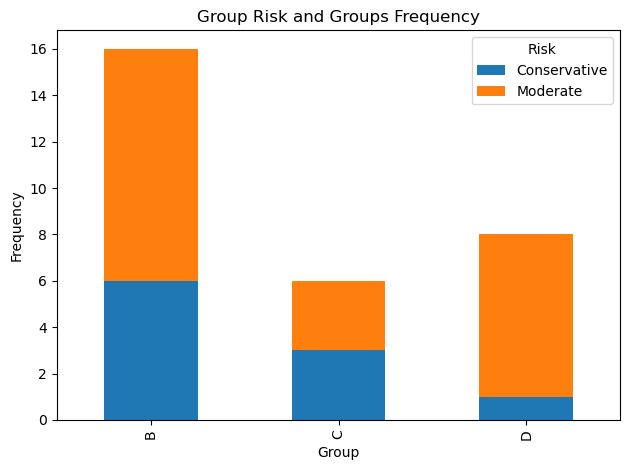

In [243]:
grouped_data = best_etf.groupby(['Group', 'Risk_Group']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_data.plot(kind='bar', stacked=True)

# Adding labels and title
plt.title('Group Risk and Groups Frequency')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.legend(title='Risk')


# Save the plot as an image
plt.tight_layout()
plt.savefig('Group_Risk_Groups_Frequency.png')

# Display the grouped bar chart
plt.show()

Data Modeling

In [228]:
#We want to analyze how the total bill influence the tip.

model = smf.ols(formula = 'ytdReturnCUR ~ yearVolatilityCUR', data = best_etf) 

In [229]:
# The fit() method allows to fit the data to the model

results= model.fit()

In [230]:
# The summary() method allows to display the results


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ytdReturnCUR   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     11.76
Date:                Mon, 04 Dec 2023   Prob (F-statistic):            0.00189
Time:                        22:35:40   Log-Likelihood:                 67.161
No. Observations:                  30   AIC:                            -130.3
Df Residuals:                      28   BIC:                            -127.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0011      0.02

In [231]:
#If we just want the coefficients, we can use the attribute params on results
print(results.params)

Intercept            0.001096
yearVolatilityCUR    0.312577
dtype: float64


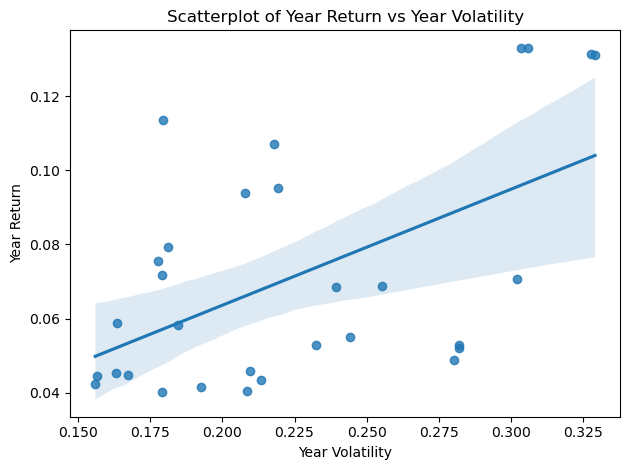

In [232]:
#Option 2: Create an Axes object using regplot

reg,ax = plt.subplots()

#use fit_reg = False if you do not want the regression line
sns.regplot(x='yearVolatilityCUR', y='ytdReturnCUR', data=best_etf, ax =ax)

ax.set_title('Scatterplot of Year Return vs Year Volatility')
ax.set_xlabel('Year Volatility')
ax.set_ylabel('Year Return')

# Save the plot as an image
plt.tight_layout()
plt.savefig('linear_regression_plot.png')

plt.show()